In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn.metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

### Problem 01 - Bank 
Output variable -> y, |
y -> Whether the client has subscribed a term deposit or not.| 
Binomial ("yes" or "no")

#### A. Importing Data

In [67]:
data_1 = pd.read_csv('Bank-full.csv', sep = ';')
data_1.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


#### b. Data Understanding

In [55]:
data_1.shape

(45211, 17)

In [56]:
data_1.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [57]:
data_1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [58]:
data_1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [14]:
data_1['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

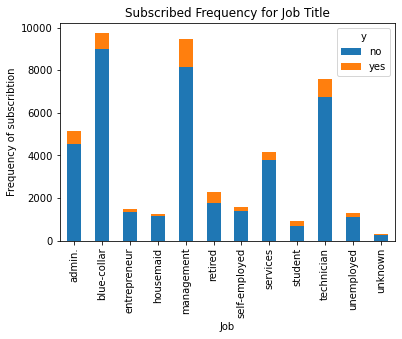

In [23]:
pd.crosstab(data_1.job,data_1.y).plot(kind='bar', stacked =True)
plt.title('Subscribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of subscribtion')
plt.show()

In [40]:
# from above value count and stacked crosstab, we can comment,
#job and subscription, ratio of subscription across various categories seems different it might help in prediction

In [15]:
data_1['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

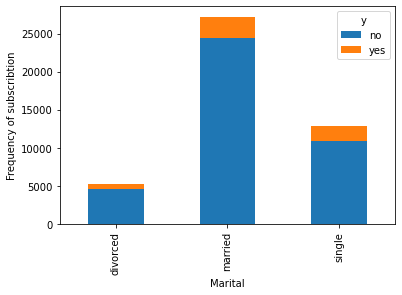

In [30]:
pd.crosstab(data_1.marital,data_1.y).plot(kind='bar', stacked =True)
plt.xlabel('Marital')
plt.ylabel('Frequency of subscribtion')
plt.show()

In [ ]:
# from above value count and stacked crosstab, we can comment,
#Marital and subscription, ratio of subscription across various categories seems different it might help in prediction

In [16]:
data_1['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

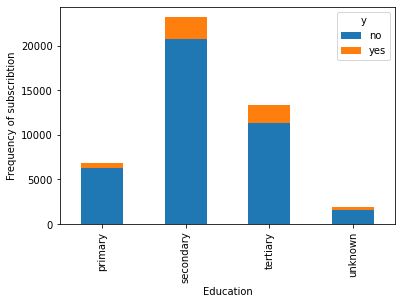

In [31]:
pd.crosstab(data_1.education,data_1.y).plot(kind='bar', stacked =True)
plt.xlabel('Education')
plt.ylabel('Frequency of subscribtion')
plt.show()

In [41]:
# from above value count and stacked crosstab, we can comment,
#Education and subscription, ratio of subscription across various categories seems differnt it might help in prediction

In [17]:
data_1['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

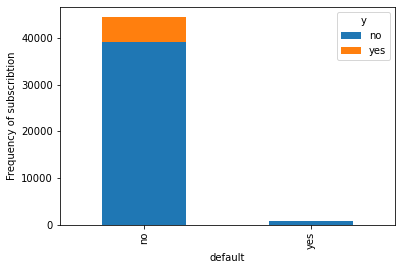

In [32]:
pd.crosstab(data_1.default,data_1.y).plot(kind='bar', stacked =True)
plt.xlabel('default')
plt.ylabel('Frequency of subscribtion')
plt.show()

In [ ]:
# from above value count and stacked crosstab, we can comment,
#dedaulters and subscription, ratio of subscription across various categories seems different it might help in prediction

In [18]:
data_1['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

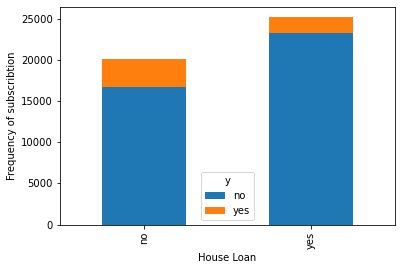

In [33]:
pd.crosstab(data_1.housing,data_1.y).plot(kind='bar', stacked =True)
plt.xlabel('House Loan')
plt.ylabel('Frequency of subscribtion')
plt.show()

In [43]:
# from above value count and stacked crosstab, we can comment,
#house loan and subscription, ratio of subscription across various categories seems different it might help in prediction

In [19]:
data_1['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

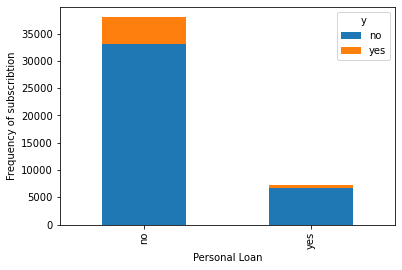

In [34]:
pd.crosstab(data_1.loan,data_1.y).plot(kind='bar', stacked =True)
plt.xlabel('Personal Loan')
plt.ylabel('Frequency of subscribtion')
plt.show()

In [ ]:
# from above value count and stacked crosstab, we can comment,
#personal loan and subscription, ratio of subscription across various categories seems same it might not help in prediction

In [20]:
data_1['contact'].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

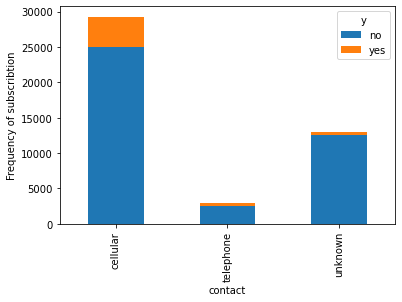

In [35]:
pd.crosstab(data_1.contact,data_1.y).plot(kind='bar', stacked =True)
plt.xlabel('contact')
plt.ylabel('Frequency of subscribtion')
plt.show()

In [42]:
# from above value count and stacked crosstab, we can comment,
#contact type and subscription, ratio of subscription across various categories seems different it might help in prediction

In [21]:
data_1['month'].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

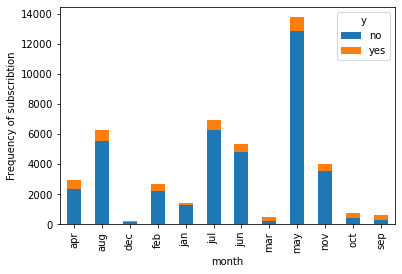

In [36]:
pd.crosstab(data_1.month,data_1.y).plot(kind='bar', stacked =True)
plt.xlabel('month')
plt.ylabel('Frequency of subscribtion')
plt.show()

In [ ]:
# from above value count and stacked crosstab, we can comment,
#month and subscription, ratio of subscription across various categories seems different it might help good in prediction

In [13]:
data_1['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

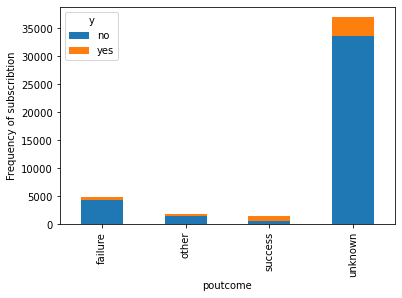

In [38]:
pd.crosstab(data_1.poutcome,data_1.y).plot(kind='bar', stacked =True)
plt.xlabel('poutcome')
plt.ylabel('Frequency of subscribtion')
plt.show()

In [ ]:
# from above value count and stacked crosstab, we can comment,
#last program output and subscription, ratio of subscription across various categories seems same it might help lot in prediction

#### C. Data Preparation

In [86]:
data_1 ['default'] = data_1 ['default'].map({'yes': 1, 'no': 0})
data_1 ['housing'] = data_1 ['housing'].map({'yes': 1, 'no': 0})
data_1 ['loan'] = data_1 ['loan'].map({'yes': 1, 'no': 0})
data_1 ['y'] = data_1 ['y'].map({'yes': 1, 'no': 0})

In [60]:
data_1.shape

(45211, 17)

In [87]:
data_1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


In [68]:
data_1 = pd.get_dummies(data_1, columns=['job'])

In [69]:
data_1 = pd.get_dummies(data_1, columns=['marital'])

In [70]:
data_1 = pd.get_dummies(data_1, columns=['education'])

In [71]:
data_1 = pd.get_dummies(data_1, columns=['month'])

In [72]:
data_1 = pd.get_dummies(data_1, columns=['contact'])

In [73]:
data_1 = pd.get_dummies(data_1, columns=['poutcome'])

In [74]:
data_1.shape

(45211, 49)

In [88]:
data_1

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


#### D. Model Building

In [89]:
x = data_1.drop(labels = 'y', axis = 1)
y = data_1[['y']]

In [90]:
x

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45207,71,0,1729,0,0,17,456,2,-1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1
45208,72,0,5715,0,0,17,1127,5,184,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
45209,57,0,668,0,0,17,508,4,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1


#### f, Model Training

In [91]:
logistic_model_0 = LogisticRegression()

In [94]:
logistic_model_0.fit(x,y)

LogisticRegression()

In [96]:
y_pred = logistic_model_0.predict(x)

#### G. Model Evaluation

In [97]:
print(accuracy_score(y,y_pred))

0.8917298887438898


In [98]:
print('Classification Report:\n',classification_report(y,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [99]:
print('Confusion Matrix:\n',confusion_matrix(y,y_pred))

Confusion Matrix:
 [[39154   768]
 [ 4127  1162]]


0.600231876814733


Text(0, 0.5, 'True Positive Rate')

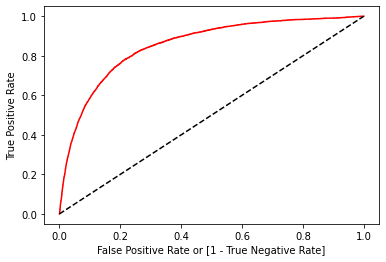

In [100]:
from sklearn.metrics import roc_curve,roc_auc_score
fpr, tpr, thresholds = roc_curve(y, logistic_model_0.predict_proba (x)[:,1])

auc = roc_auc_score(y,y_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

#### H. Output Interpretation

In [101]:
# Accuracy is 89 % fro given data.
# In confusion matrix, True Positive and True Neagative are 1162 and 39154 resp.
# False Positive and False Negative are 768 and 4127

## THE END